In [42]:
import numpy as np
import sklearn.cluster
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [43]:
user_ratings = pd.read_csv('../datasets/user_features.csv')
print(user_ratings.head())
user_ratings.drop('Name', axis=1, inplace=True) 
user_ratings = np.array(user_ratings)
user_ratings.shape

       Name    Rating  Visitors  Historical   Natural  Amusement     Beach  \
0      Noel -0.427668 -0.774930    0.149490  0.801024   0.738766  0.999667   
1     Harsh  0.389013 -0.763299    0.328030  0.411008  -0.028038  0.755883   
2  Vikranth  0.918646 -1.232839   -0.406517  1.118889  -0.299624  0.165493   
3  Muthuraj  0.125790 -0.253804    0.568586  0.210296  -0.321106  0.697222   
4    Armaan -0.401209 -1.032330    0.529252  0.321124  -0.747958  1.209483   

          B  
0  0.835758  
1  0.939790  
2  0.370931  
3  0.952623  
4  0.663897  


(5, 7)

In [44]:

num_clusters = 3
kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(user_ratings)

user_cluster_labels = kmeans.labels_
users = ['Noel','Harsh','Vikranth','Muthuraj','Armaan']
print("K-means cluster labels for users:")
for user_id, label in enumerate(user_cluster_labels):
    print(f"User {users[user_id]}: Cluster {label}")

K-means cluster labels for users:
User Noel: Cluster 2
User Harsh: Cluster 1
User Vikranth: Cluster 0
User Muthuraj: Cluster 1
User Armaan: Cluster 1


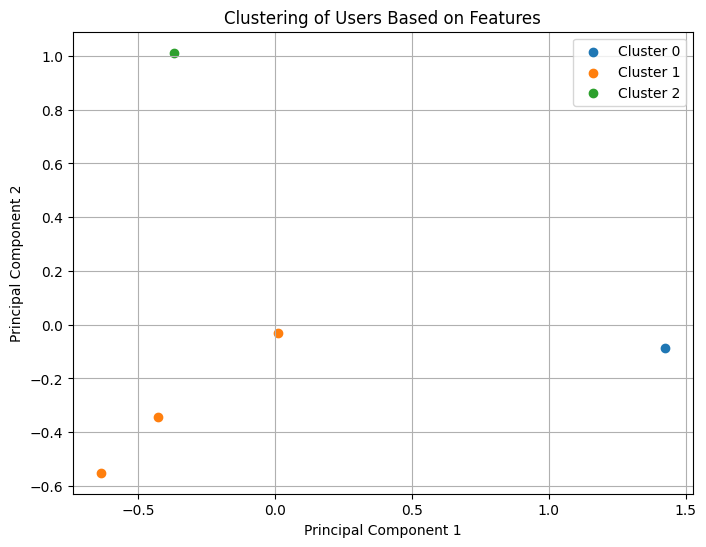

In [45]:
pca = PCA(n_components=2)
user_ratings_2d = pca.fit_transform(user_ratings)

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    plt.scatter(user_ratings_2d[user_cluster_labels == cluster_label, 0], 
                user_ratings_2d[user_cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

plt.title('Clustering of Users Based on Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
attraction_features = pd.read_csv('../datasets/final_attractions.csv', usecols=['Name', 'Rating', 'Visitors', 'Historical', 'Natural', 'Amusement', 'Beach'])
attraction_names = list(attraction_features['Name'])
attraction_features.drop('Name', axis=1, inplace=True)
print(attraction_features.head())
print(len(attraction_names))

   Rating  Visitors  Historical  Natural  Amusement  Beach
0     4.8  30000000           5        4          2      0
1     4.5   2000000           2        5          3      0
2     4.4   1000000           3        5          3      0
3     4.3   2000000           2        3          4      5
4     4.5   1500000           5        4          2      0
1252


In [47]:
num_clusters = 5
kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(attraction_features)

user_cluster_labels = kmeans.labels_
print("K-means cluster labels for attractions:")
for attraction_id, label in enumerate(user_cluster_labels):
    print(f"Attraction {attraction_names[attraction_id]}: Cluster {label}")

K-means cluster labels for attractions:
Attraction Tirumala Venkateswara Temple: Cluster 3
Attraction Araku Valley: Cluster 0
Attraction Borra Caves: Cluster 0
Attraction Ramakrishna Beach: Cluster 0
Attraction Srisailam: Cluster 0
Attraction Kanaka Durga Temple: Cluster 0
Attraction Undavalli Caves: Cluster 0
Attraction Lepakshi: Cluster 0
Attraction Ahobilam Temple: Cluster 0
Attraction Kailasagiri: Cluster 0
Attraction Gandikota: Cluster 0
Attraction Thotlakonda Buddhist Complex: Cluster 0
Attraction Kolleru Lake: Cluster 0
Attraction Manginapudi Beach: Cluster 0
Attraction Sri Venkateswara National Park: Cluster 0
Attraction Pavurallakonda: Cluster 0
Attraction Yaganti Temple: Cluster 0
Attraction Maredumilli: Cluster 0
Attraction Rajahmundry Godavari Bridge: Cluster 0
Attraction Draksharamam Temple: Cluster 0
Attraction Suryalanka Beach: Cluster 0
Attraction Sankaram: Cluster 0
Attraction Simhachalam Temple: Cluster 0
Attraction VUDA Park: Cluster 0
Attraction Dwaraka Tirumala: Cl

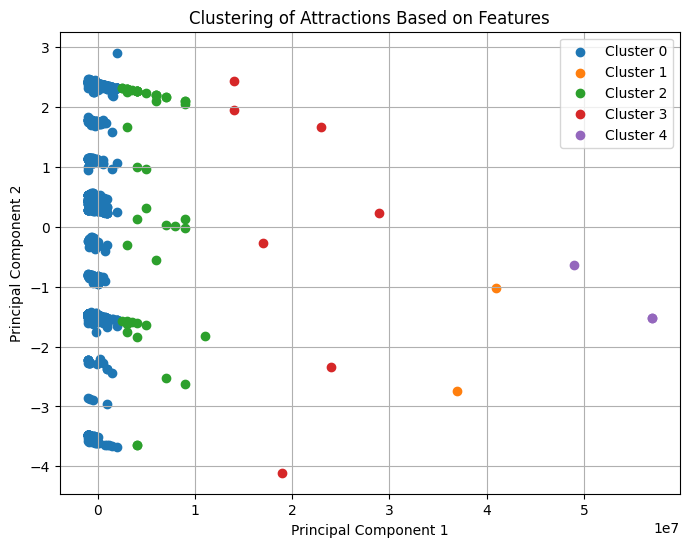

In [48]:
pca = PCA(n_components=2)
attraction_features_2d = pca.fit_transform(attraction_features)

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    plt.scatter(attraction_features_2d[user_cluster_labels == cluster_label, 0], 
                attraction_features_2d[user_cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

plt.title('Clustering of Attractions Based on Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()